# APPLICATION OF NLP FOR E-COMMERCE REVIEW SENTIMENT

## Data Collecting

In [42]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
pip install nltk; #library untuk NLP

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#library'

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re # Regular Expression untuk membersihkan teks

import nltk
nltk.download('stopwords') # mengunduh kata kata umum seperti the,is,etc.
nltk.download('punkt') # mengunduh tokenizer untuk memecah teks menjadi kata-kata.
from nltk.corpus import stopwords # Mengimpor kumpulan stopwords untuk digunakan nanti saat membersihkan teks.
from nltk.stem import WordNetLemmatizer # mengimpor kata untuk lemmatisasi yaitu mengubah kata ke bentuk dasar.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
df= pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


## Exploratory Data analysis

In [46]:
df.shape #  Melihat dimensi dari DataFrame.

(4915, 12)

In [47]:
df.info()#  Menampilkan informasi ringkas tentang sebuah DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [48]:
df.describe()# Menampilkan statistik deskriptif dari kolom-kolom numerik

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [49]:
df.isna().sum()#Mengetahui jumlah nilai kosong (missing values / NaN) di setiap kolom

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [50]:
df.dropna(subset=['reviewerName', 'reviewText'], inplace=True)# Menghapus baris yang memiliki NaN (kosong) di kolom reviewerName atau reviewText
df.isna().sum()#  Menampilkan jumlah NaN yang tersisa di setiap kolom

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

### Ambil dua kolom penting

In [51]:
df = df[['reviewText', 'overall']]

### Cek Distribusi Rating

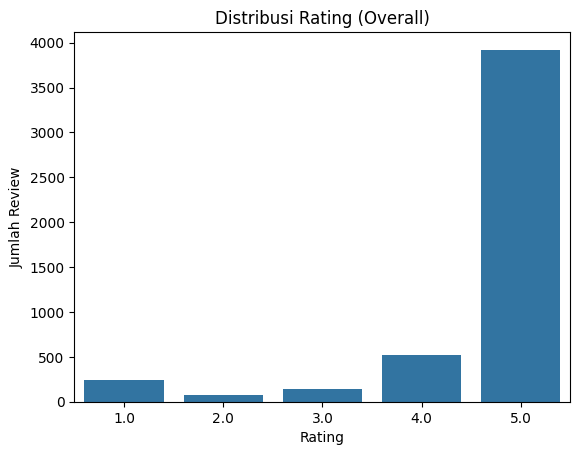

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='overall', data=df)
plt.title('Distribusi Rating (Overall)')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()

### Membuat Kolom Sentimen (Labeling) dari overall dan melihat persebarannya

In [53]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negatif'
    elif rating == 3:
        return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['overall'].apply(label_sentiment)# Menerapkan fungsi ke setiap nilai pada kolom overall


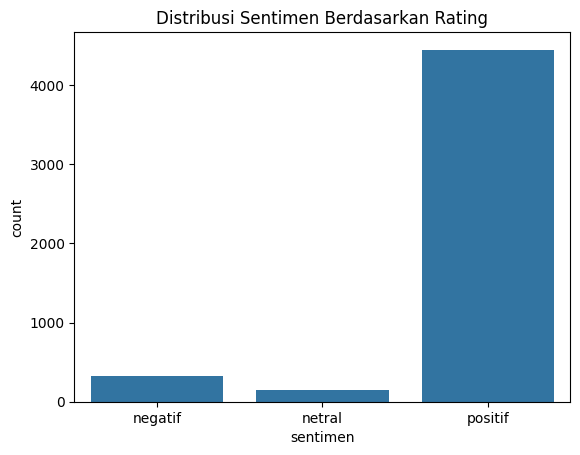

In [54]:
sns.countplot(x='sentimen', data=df, order=['negatif', 'netral', 'positif'])
plt.title('Distribusi Sentimen Berdasarkan Rating')
plt.show()

### Tambahkan Kolom Panjang Teks Review dan melihat persebarannya

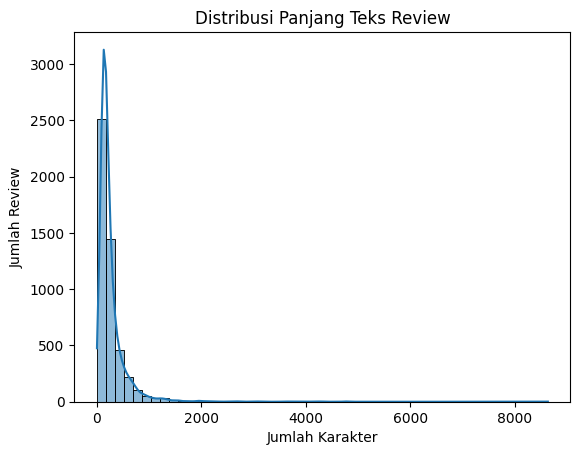

In [55]:
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x)))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribusi Panjang Teks Review')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Review')
plt.show()


In [56]:
print(df['review_length'].mean())# Melihat rata-rata panjang review


267.7999185833503


### Melihat Rata-rata Panjang Review per Label Sentimen

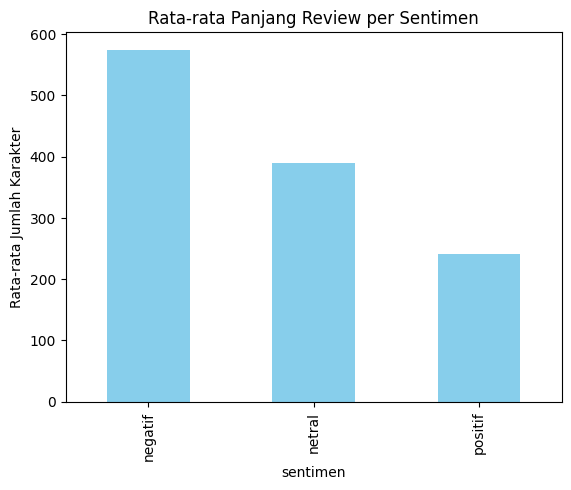

In [57]:
df.groupby('sentimen')['review_length'].mean().plot(kind='bar', color='skyblue')
plt.title('Rata-rata Panjang Review per Sentimen')
plt.ylabel('Rata-rata Jumlah Karakter')
plt.show()


In [58]:
df.head()

,reviewText,overall,sentimen,review_length
1,"Purchased this for my device, it worked as adv...",5.0,positif,158
2,it works as expected. I should have sprung for...,4.0,positif,166
3,This think has worked out great.Had a diff. br...,5.0,positif,340
4,"Bought it with Retail Packaging, arrived legit...",5.0,positif,290
5,It's mini storage. It doesn't do anything els...,5.0,positif,282


## Data Prepocessing

### Cleaning Text

#### Mengubah ke lowercase dan menghapus tanda baca,angka dan stopwords

In [ ]:
import re # regular expressions
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords # stopwords

stop_words = set(stopwords.words('english')) # Mengambil daftar stopwords bahasa Inggris dari NLTK.

# cleaning text
def clean_text(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()
    # 2. Hapus tanda baca dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. Hapus stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [ ]:
df['clean_review'] = df['reviewText'].apply(clean_text) # Menerapkan fungsi ke setiap nilai pada kolom reviewText dan menyimpan hasilnya dalam kolom baru bernama clean_review

#### Menghapus spacing

In [61]:
def rewhitespace(text):
    corrected = str(text)
    corrected = re.sub(r"( )\1+", r"\1", corrected)  # Hapus spasi ganda
    corrected = re.sub(r"(\n)\1+", r"\1", corrected)  # Hapus newline ganda
    corrected = re.sub(r"(\r)\1+", r"\1", corrected)  # Hapus carriage return ganda
    corrected = re.sub(r"(\t)\1+", r"\1", corrected)  # Hapus tab ganda
    return corrected.strip()


In [62]:
df.head()

,reviewText,overall,sentimen,review_length,clean_review
1,"Purchased this for my device, it worked as adv...",5.0,positif,158,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,4.0,positif,166,works expected sprung higher capacity think ma...
3,This think has worked out great.Had a diff. br...,5.0,positif,340,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",5.0,positif,290,bought retail packaging arrived legit orange e...
5,It's mini storage. It doesn't do anything els...,5.0,positif,282,mini storage doesnt anything else supposed pur...


#### Menghapus kolom yang sudah tidak terpakai

In [63]:
df_final = df.drop(columns=['reviewText', 'overall', 'review_length'])

In [64]:
df_final.head()

,sentimen,clean_review
1,positif,purchased device worked advertised never much ...
2,positif,works expected sprung higher capacity think ma...
3,positif,think worked greathad diff bran gb card went s...
4,positif,bought retail packaging arrived legit orange e...
5,positif,mini storage doesnt anything else supposed pur...


### Tokenization

Memecah Teks menjadi kata kata agar tiap elemen dapat di analisis

In [65]:
# Hapus resource punkt yang rusak
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)

# Unduh ulang resource punkt
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
# Import dan lakukan tokenisasi
from nltk.tokenize import word_tokenize

def token(text):
    return word_tokenize(text)

df_final['tokenized_review'] = df_final['clean_review'].apply(lambda x: x.split())
df_final.head()


,sentimen,clean_review,tokenized_review
1,positif,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,..."
2,positif,works expected sprung higher capacity think ma...,"[works, expected, sprung, higher, capacity, th..."
3,positif,think worked greathad diff bran gb card went s...,"[think, worked, greathad, diff, bran, gb, card..."
4,positif,bought retail packaging arrived legit orange e...,"[bought, retail, packaging, arrived, legit, or..."
5,positif,mini storage doesnt anything else supposed pur...,"[mini, storage, doesnt, anything, else, suppos..."


### lemmatization

Melakukan lemmatization yaitu untuk Menghapus imbuhan

In [67]:
import os
nltk.data.path.append('/root/nltk_data')


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

# Unduh resource yang dibutuhkan
nltk.download('punkt') # Tokenisasi
nltk.download('wordnet')# Lemmatization
nltk.download('omw-1.4')# Lemmatization
nltk.download('averaged_perceptron_tagger')#POS tagging
nltk.download('averaged_perceptron_tagger_eng')#POS tagging

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()# Membuat objek lemmatizer yang nanti akan digunakan untuk mengubah kata ke bentuk dasarnya.

# Fungsi untuk mengonversi POS tag ke format WordNet
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,   # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Fungsi lemmatization
def lemmatize_review(review):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review]

# Terapkan lemmatization 
df_final['lemmatized_review'] = df_final['tokenized_review'].apply(lemmatize_review)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rifqi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [69]:
df_final.head()

,sentimen,clean_review,tokenized_review,lemmatized_review
1,positif,purchased device worked advertised never much ...,"[purchased, device, worked, advertised, never,...","[purchase, device, work, advertised, never, mu..."
2,positif,works expected sprung higher capacity think ma...,"[works, expected, sprung, higher, capacity, th...","[work, expect, sprung, high, capacity, think, ..."
3,positif,think worked greathad diff bran gb card went s...,"[think, worked, greathad, diff, bran, gb, card...","[think, work, greathad, diff, bran, gb, card, ..."
4,positif,bought retail packaging arrived legit orange e...,"[bought, retail, packaging, arrived, legit, or...","[bought, retail, packaging, arrive, legit, ora..."
5,positif,mini storage doesnt anything else supposed pur...,"[mini, storage, doesnt, anything, else, suppos...","[mini, storage, doesnt, anything, else, suppos..."


In [70]:
df_final.drop(['clean_review', 'tokenized_review'], axis=1, inplace=True)

In [71]:
df_final.head()

,sentimen,lemmatized_review
1,positif,"[purchase, device, work, advertised, never, mu..."
2,positif,"[work, expect, sprung, high, capacity, think, ..."
3,positif,"[think, work, greathad, diff, bran, gb, card, ..."
4,positif,"[bought, retail, packaging, arrive, legit, ora..."
5,positif,"[mini, storage, doesnt, anything, else, suppos..."


In [72]:
# Gabungkan daftar kata menjadi satu string
df_final['lemmatized_review'] = df_final['lemmatized_review'].apply(lambda tokens: ' '.join(tokens))

In [73]:
df_final.head()

,sentimen,lemmatized_review
1,positif,purchase device work advertised never much pho...
2,positif,work expect sprung high capacity think make bi...
3,positif,think work greathad diff bran gb card go south...
4,positif,bought retail packaging arrive legit orange en...
5,positif,mini storage doesnt anything else suppose purc...


## Training models

### Melakukan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #mengubah teks menjadi angka berdasarkan tf-idf

X = df_final['lemmatized_review']# fitur input
y = df_final['sentimen']# target atau label

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
# Hanya mengambil 5000 fitur lalu gunakan unigram(kata tunggal) dan bigram(pasangan kata) selanjutnya hapus stopwords
review_tf = tfidf_vectorizer.fit_transform(X.astype('U'))
#memastikasn semua data dalam tipe string unicode dan akan kita train dari teks untuk membuat tf-idf
review_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 121155 stored elements and shape (4913, 5000)>

### Menangani Data Imbalance

In [75]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)# Membuat objek ros untuk melakukan oversampling.
X_resampled, y_resampled = ros.fit_resample(review_tf, y)

# review_tf: Data input fitur
# y: Target/label
# fit_resample(...) akan Melatih oversampler berdasarkan y
# Menambahkan data dari kelas minoritas sampai semua kelas memiliki jumlah yang sama.
# sehingga menghasilkan
# X_resampled: Data input fitur setelah oversampling
# y_resampled: Target/label setelah oversampling


In [77]:
import pandas as pd

# Melihat distribusi label setelah oversampling
print(pd.Series(y_resampled).value_counts())


sentimen
positif    4447
netral     4447
negatif    4447
Name: count, dtype: int64


### Training dan Evaluasi Logistic Regression dengan Data Oversampling

Logistic Regression Accuracy:  0.9797677032596478
Logistic Regression Precision:  0.9803708906773339
Logistic Regression Recall:  0.9797752808988763
Logistic Regression F1 Score:  0.9796069108889712

Confusion Matrix:
[[889   0   0]
 [  0 890   0]
 [ 31  23 836]]
----------------------------------------------------------
              precision    recall  f1-score   support

     negatif       0.97      1.00      0.98       889
      netral       0.97      1.00      0.99       890
     positif       1.00      0.94      0.97       890

    accuracy                           0.98      2669
   macro avg       0.98      0.98      0.98      2669
weighted avg       0.98      0.98      0.98      2669



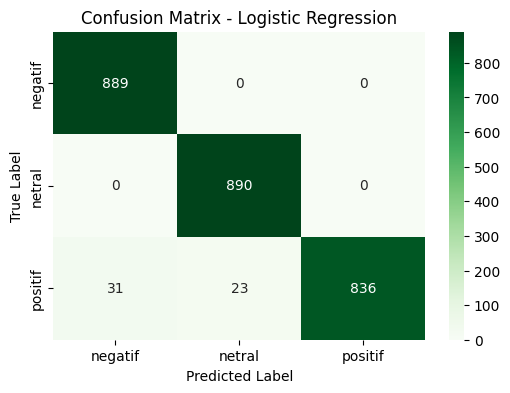

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split data dengan stratify agar distribusi kelas tetap proporsional
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


# 2. Logistic Regression dengan class_weight='balanced'
clf_lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
clf_lr.fit(X_train, y_train)

# 3. Prediksi
predicted_lr = clf_lr.predict(X_test)

# 4. Evaluasi
print("Logistic Regression Accuracy: ", accuracy_score(y_test, predicted_lr))
print("Logistic Regression Precision: ", precision_score(y_test, predicted_lr, average="macro"))
print("Logistic Regression Recall: ", recall_score(y_test, predicted_lr, average="macro"))
print("Logistic Regression F1 Score: ", f1_score(y_test, predicted_lr, average="macro"))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, predicted_lr, labels=clf_lr.classes_)
print(f'\nConfusion Matrix:\n{cm}')
print("----------------------------------------------------------")
print(classification_report(y_test, predicted_lr, zero_division=0))

# 6. Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=clf_lr.classes_, yticklabels=clf_lr.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Menyimpan model

### Menyimpan model machine learning dan TF-IDF vectorizer ke dalam file

In [ ]:
import pickle

# Simpan TF-IDF Vectorizer
with open('tfidf_vectorizer.sav', 'wb') as f:# membuka file tfidf_vectorizer.sav untuk menulis
    pickle.dump(tfidf_vectorizer, f)# menyimpan objek tfidf_vectorizer ke file tfidf_vectorizer.sav
print("TF-IDF Vectorizer saved to 'tfidf_vectorizer.sav'")

# Simpan Logistic Regression Model
with open('logistic_regression_model.sav', 'wb') as f:# membuka file logistic_regression_model.sav untuk menulis
    pickle.dump(clf_lr, f)# menyimpan objek clf_lr ke file logistic_regression_model.sav
print("Logistic Regression model saved to 'logistic_regression_model.sav'")


TF-IDF Vectorizer saved to 'tfidf_vectorizer.sav'
Logistic Regression model saved to 'logistic_regression_model.sav'


###  load model machine learning dan TF-IDF vectorizer dari file .sav

In [ ]:
import pickle

# Load TF-IDF Vectorizer
with open('tfidf_vectorizer.sav', 'rb') as f:# membuka file tfidf_vectorizer.sav untuk membaca
    tfidf_vectorizer = pickle.load(f)# membaca objek tfidf_vectorizer dari file tfidf_vectorizer.sav
print("TF-IDF Vectorizer loaded successfully.")

# Load Logistic Regression Model
with open('logistic_regression_model.sav', 'rb') as f:# membuka file logistic_regression_model.sav untuk membaca
    clf_lr = pickle.load(f)# membaca objek clf_lr dari file logistic_regression_model.sav
print("Logistic Regression model loaded successfully.")


TF-IDF Vectorizer loaded successfully.
Logistic Regression model loaded successfully.


## Pengujian Model yang sudah disimpan dan di load

In [ ]:
print(df_final.columns)# Menampilkan nama kolom pada df_final

Index(['sentimen', 'lemmatized_review'], dtype='object')


In [82]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# # Duplikasi df_final untuk trainning
test_df = df_final.copy()

# Fitur dan label
test_X = test_df['lemmatized_review']
test_y = test_df['sentimen']

# Transformasi teks ke TF-IDF
test_tf = tfidf_vectorizer.transform(test_X.astype('U'))

# Prediksi label
test_predictions = clf_lr.predict(test_tf)

# Evaluasi model
print("Test Accuracy: ", accuracy_score(test_y, test_predictions))
print("Test Precision: ", precision_score(test_y, test_predictions, average='macro'))
print("Test Recall: ", recall_score(test_y, test_predictions, average='macro'))
print("Test F1 Score: ", f1_score(test_y, test_predictions, average='macro'))

print("\nConfusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\nClassification Report:")
print(classification_report(test_y, test_predictions, zero_division=0))

# Tambahkan kolom hasil prediksi ke DataFrame
test_df['Predicted Label'] = test_predictions

# Tampilkan 5 baris pertama
test_df


Test Accuracy:  0.9733360472216568
Test Precision:  0.8471616846774818
Test Recall:  0.9901806461284761
Test F1 Score:  0.9085249558084438

Confusion Matrix:
[[ 324    0    0]
 [   0  142    0]
 [  82   49 4316]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.80      1.00      0.89       324
      netral       0.74      1.00      0.85       142
     positif       1.00      0.97      0.99      4447

    accuracy                           0.97      4913
   macro avg       0.85      0.99      0.91      4913
weighted avg       0.98      0.97      0.97      4913



,sentimen,lemmatized_review,Predicted Label
1,positif,purchase device work advertised never much pho...,positif
2,positif,work expect sprung high capacity think make bi...,positif
3,positif,think work greathad diff bran gb card go south...,netral
4,positif,bought retail packaging arrive legit orange en...,positif
5,positif,mini storage doesnt anything else suppose purc...,positif
...,...,...,...
4910,negatif,bought sandisk gb class use htc inspire month ...,negatif
4911,positif,use extend capability samsung galaxy note grea...,positif
4912,positif,great card fast reliable come optional adapter...,positif
4913,positif,good amount space stuff want fit gopro say,positif
